In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Create an ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

# Flow training data (80% training)
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Cattle Project (Yohan)/Cow health management/Disease Detection/CNN',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Flow validation data (20% validation)
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Cattle Project (Yohan)/Cow health management/Disease Detection/CNN',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 850 images belonging to 4 classes.
Found 212 images belonging to 4 classes.


In [6]:
class_indices = train_generator.class_indices
print("Class Indices (Class Name to Label):")
print(class_indices)

# Get class labels for training data
train_labels = train_generator.classes
print("Training Data Labels:")
print(train_labels)

# Get class labels for validation data
val_labels = validation_generator.classes
print("Validation Data Labels:")
print(val_labels)

Class Indices (Class Name to Label):
{'dermatitis': 0, 'healthycows': 1, 'lumpycows': 2, 'respiratory': 3}
Training Data Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# **Approch 01 - Custom CNN**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Updated for 4 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(train_generator, epochs=40, validation_data=validation_generator)


Epoch 1/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7405 - loss: 0.6229 - val_accuracy: 0.7358 - val_loss: 0.6714
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7049 - loss: 0.6524 - val_accuracy: 0.7689 - val_loss: 0.6110
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7424 - loss: 0.5982 - val_accuracy: 0.7783 - val_loss: 0.5808
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7219 - loss: 0.5811 - val_accuracy: 0.7264 - val_loss: 0.6745
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7067 - loss: 0.6610 - val_accuracy: 0.7594 - val_loss: 0.6360
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7394 - loss: 0.6099 - val_accuracy: 0.6981 - val_loss: 0.6848
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7211 - loss: 0.6553 - val_accuracy: 0.7877 - val_loss: 0.6379
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7386 - loss: 0.5997 - val_accuracy: 0.7500 - val_loss:

In [16]:
model.save('cattle_disease_prediction_v2.h5')


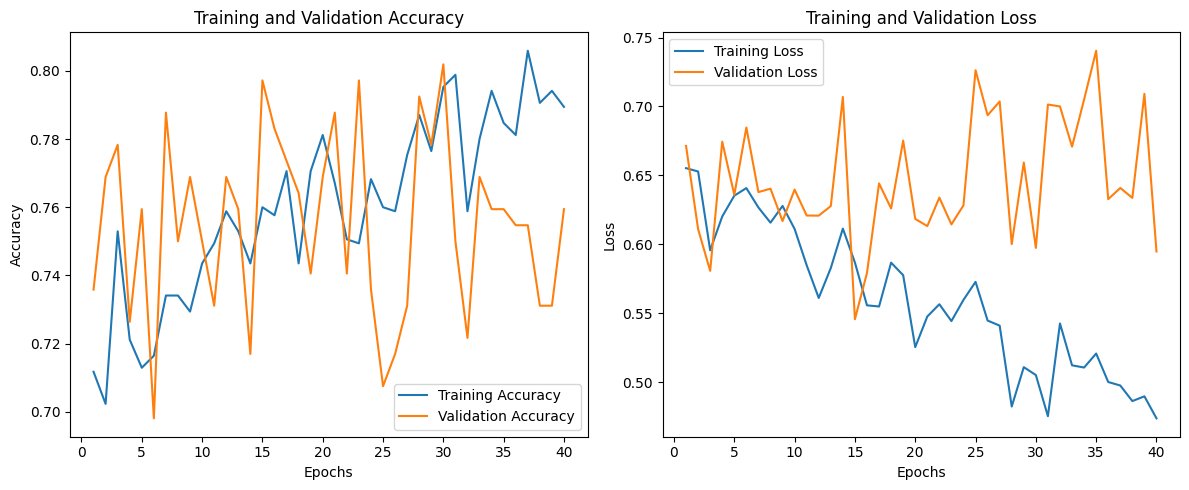

In [15]:
epochs = range(1, 41)  # Adjust to match the number of epochs

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


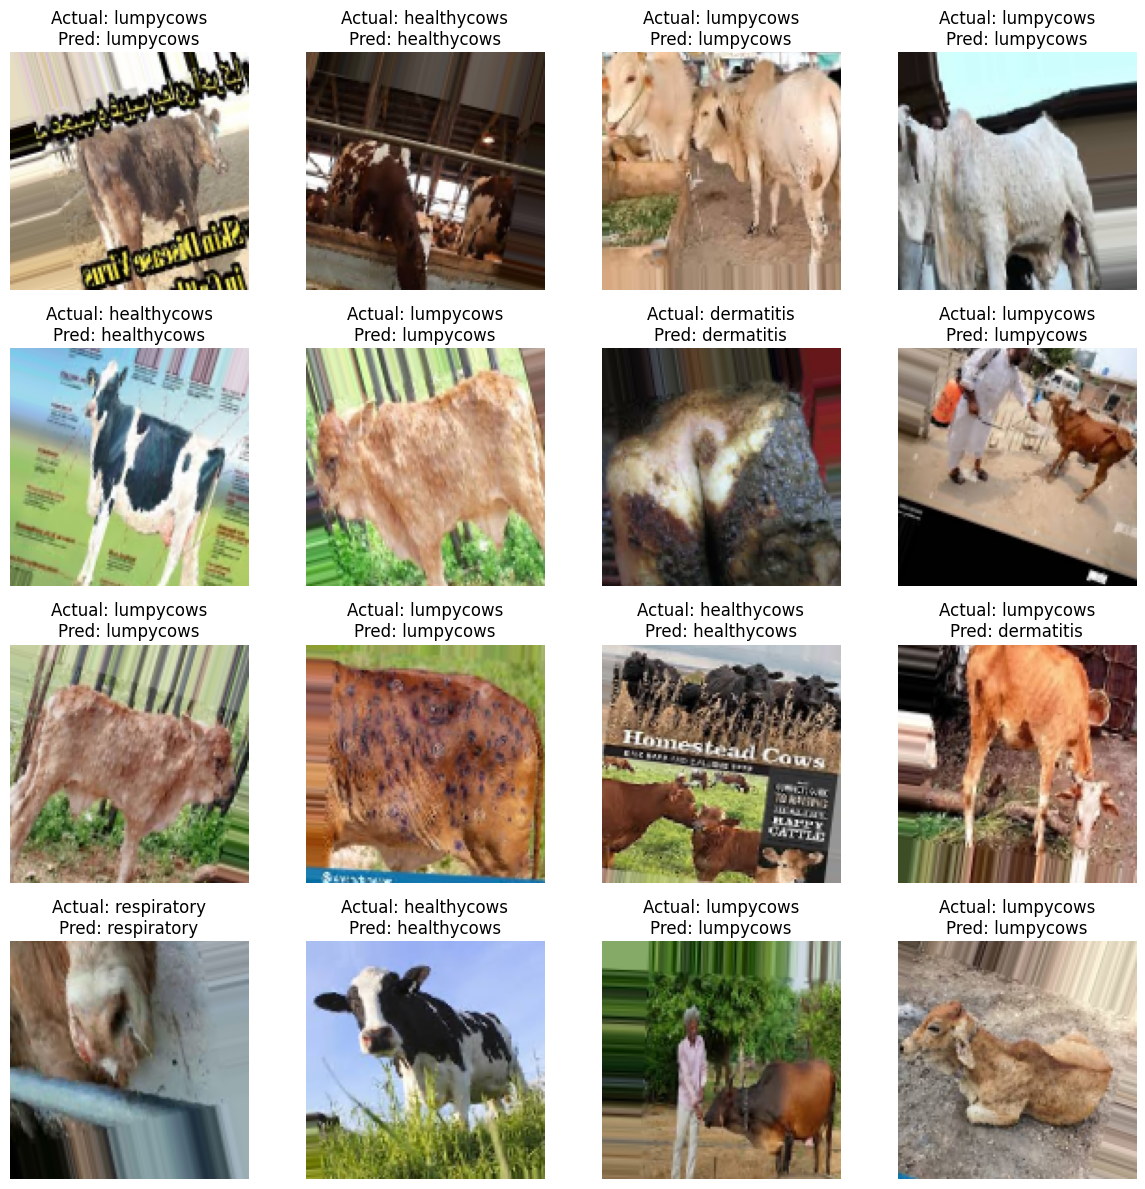

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Classes
label_map = {0: 'dermatitis', 1: 'healthycows', 2: 'lumpycows', 3: 'respiratory'}
validation_batch, validation_labels = next(validation_generator)

# prediction
predicted_labels = model.predict(validation_batch)
predicted_labels = np.argmax(predicted_labels, axis=1)
actual_labels = np.argmax(validation_labels, axis=1)

# Define grid
num_images = 16
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(validation_batch[i])
    actual_label_name = label_map[actual_labels[i]]
    predicted_label_name = label_map[predicted_labels[i]]

    axes[i].set_title(f"Actual: {actual_label_name}\nPred: {predicted_label_name}")
    axes[i].axis('off')  # Hide axis

# Display
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


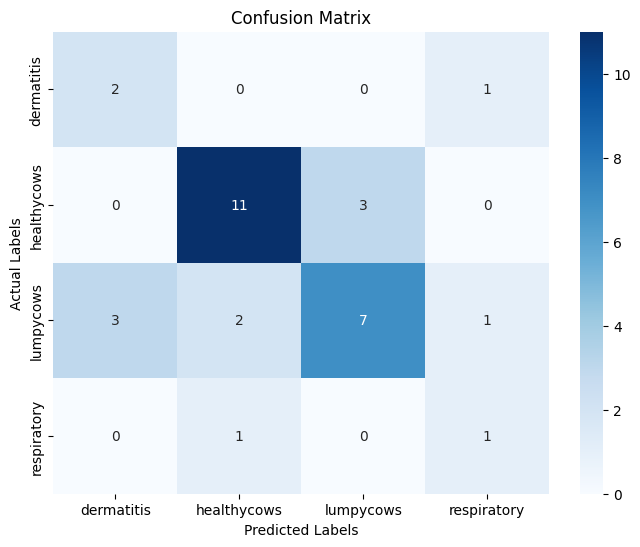

Classification Report:

              precision    recall  f1-score   support

  dermatitis       0.40      0.67      0.50         3
 healthycows       0.79      0.79      0.79        14
   lumpycows       0.70      0.54      0.61        13
 respiratory       0.33      0.50      0.40         2

    accuracy                           0.66        32
   macro avg       0.55      0.62      0.57        32
weighted avg       0.69      0.66      0.66        32



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

validation_batch, validation_labels = next(validation_generator)
predicted_labels = model.predict(validation_batch)
predicted_labels = np.argmax(predicted_labels, axis=1)
actual_labels = np.argmax(validation_labels, axis=1)

cm = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(actual_labels, predicted_labels, labels=list(label_map.keys()), target_names=list(label_map.values())))


# **Approch 02 - RESNET**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model, without the top classification layers
resnet_model = ResNet50(include_top=False, input_shape=(128, 128, 3), weights='imagenet')

# Create a Sequential model and add ResNet50 as the base
model_resnet = Sequential()

# Add ResNet50 as the feature extractor
model_resnet.add(resnet_model)

# Flatten the output from ResNet50 and add custom Dense layers
model_resnet.add(Flatten())
model_resnet.add(Dense(128, activation='relu'))
model_resnet.add(Dense(4, activation='softmax'))  # Adjust for 4 output classes

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_resnet.fit(train_generator, epochs=40, validation_data=validation_generator)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 332s 10s/step - accuracy: 0.5144 - loss: 5.7426 - val_accuracy: 0.4858 - val_loss: 6.8116
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 277s 10s/step - accuracy: 0.6619 - loss: 0.8114 - val_accuracy: 0.4858 - val_loss: 120.3629
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 274s 10s/step - accuracy: 0.6318 - loss: 0.8331 - val_accuracy: 0.4858 - val_loss: 1.1638
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 281s 10s/step - accuracy: 0.6967 - loss: 0.7011 - val_accuracy: 0.4858 - val_loss: 1.3556
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 278s 10s/step - accuracy: 0.7184 - loss: 0.6763 - val_accuracy: 0.4858 - val_loss: 1.5341
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 282s 10s/step - accuracy: 0.7456 - loss: 0.6325 - val_accuracy: 0.4858 - val_loss: 2.2435
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 322s 10s/step - accuracy: 0.7430 - loss: 0.6119 - val_accuracy: 0.4858 - val_loss: 2.4656
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 283s 10s/step

In [ ]:
model_resnet.save('cattle_disease_prediction_resnet2.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load a batch of images from the validation set
validation_batch, validation_labels = next(validation_generator)  # get a single batch of validation data

# Get the predicted labels from the model
predicted_labels = model_resnet.predict(validation_batch)

# Convert predicted probabilities to class labels (get index of max probability)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert actual one-hot labels to class labels
actual_labels = np.argmax(validation_labels, axis=1)

# Define the number of images to display (16 images in a 4x4 grid)
num_images = 16
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(validation_batch[i])
    axes[i].set_title(f"Actual: {actual_labels[i]}, Pred: {predicted_labels[i]}")
    axes[i].axis('off')  # Hide axis

# Display the plot
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.